# Import Necessary Libraries.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
features = []
with open('C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

print('No of Features:%d'%(len(features)))

No of Features:561


# Load the Data Set.

In [3]:
df = pd.read_csv('C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [4]:
df.columns = features

# Add subject column to the dataframe.

In [5]:
df['subject'] = pd.read_csv('C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt')

In [6]:
df['subject']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
7347    30.0
7348    30.0
7349    30.0
7350    30.0
7351     NaN
Name: subject, Length: 7352, dtype: float64

In [7]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30.0
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30.0
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30.0
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30.0


In [8]:
Y_train = pd.read_csv('C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',names=['Activity'],squeeze=True)

Y_train_activity = Y_train.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})

Y_train_activity = pd.DataFrame(Y_train_activity)

Y_train_activity

df['Activity'] = Y_train_activity['Activity']

In [9]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30.0,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30.0,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30.0,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30.0,WALKING_UPSTAIRS


In [10]:
X_train = df.iloc[:,:-2]

In [11]:
X_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [12]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [13]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30.0,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30.0,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30.0,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30.0,WALKING_UPSTAIRS


# Data Cleaning

# 1. Check for duplicates

In [14]:
print("Number of duplicates in df = {}".format(sum(df.duplicated())))

Number of duplicates in df = 0


# 2. Check for null / nan values.

In [15]:
print("We have {} nan/null values for df".format(df.isnull().values.sum()))

We have 1 nan/null values for df


In [16]:
df.dropna(inplace=True)

In [17]:
print("We have {} nan/null values for df".format(df.isnull().values.sum()))

We have 0 nan/null values for df


# 3.Check for Data Imbalance.

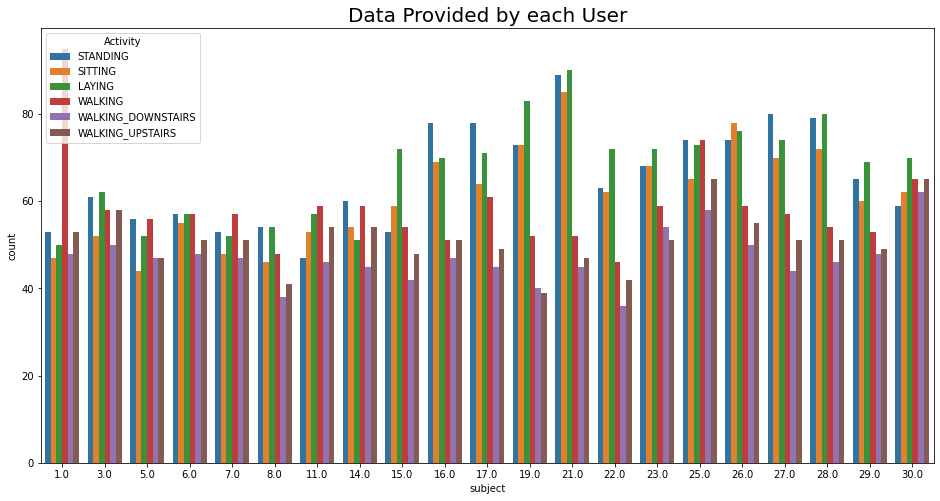

In [18]:
plt.figure(figsize=(16,8))
plt.title("Data Provided by each User", fontsize=20)
sns.countplot(x='subject',hue='Activity',data=df)
plt.show()


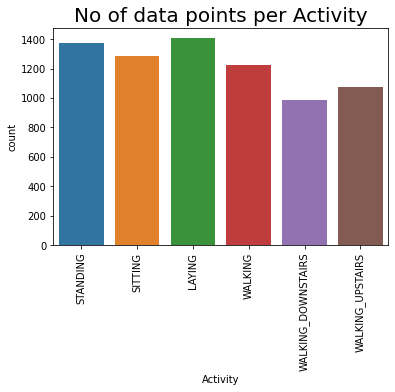

In [19]:
plt.title("No of data points per Activity",fontsize=20)
sns.countplot(df.Activity)
plt.xticks(rotation=90)
plt.show()

# Conclusion : Data Is Balance

# 4. Changing/Cleaning Feature Names.

In [20]:
columns = df.columns

In [21]:
columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [22]:
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

df.columns = columns

In [23]:
df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

# Exploratory Data Analysis. 

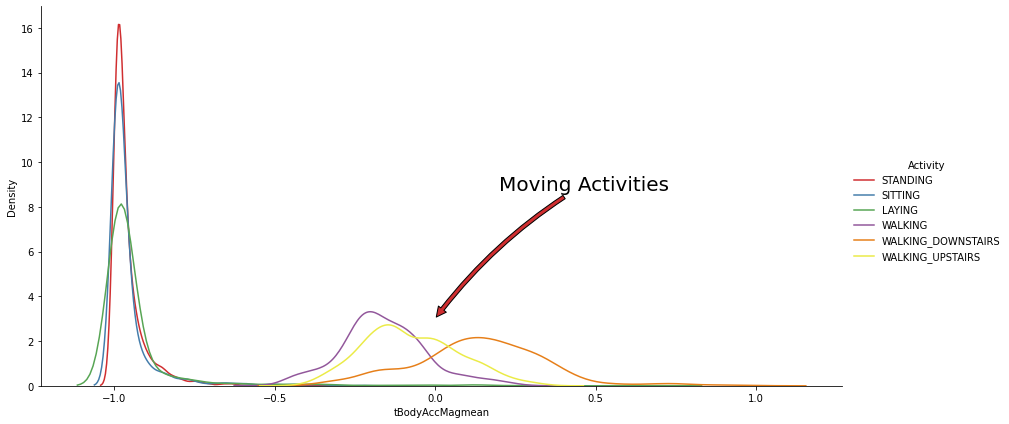

In [24]:
sns.set_palette("Set1",desat=0.80)
facetgrid = sns.FacetGrid(df,hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist=False).add_legend()

plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9,16), size=20,\
                              va='center',ha='left',\
                              arrowprops=dict(arrowstyle='simple',connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2,9), size=20,\
                            va='center',ha='left',\
                              arrowprops=dict(arrowstyle='simple',connectionstyle="arc3,rad=0.1"))
                              
plt.show()

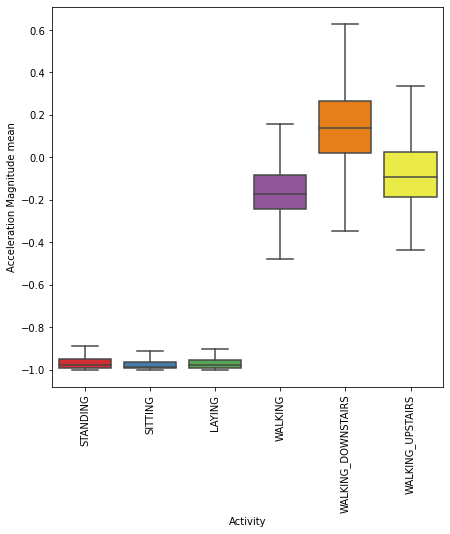

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity',y='tBodyAccMagmean',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation = 90)
plt.show()

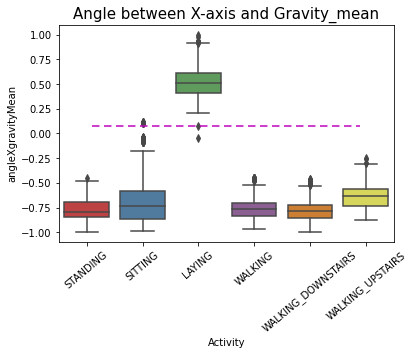

In [26]:
sns.boxplot(y='angleXgravityMean',x='Activity', data=df)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5,3))
plt.title("Angle between X-axis and Gravity_mean", fontsize=15)
plt.xticks(rotation=40)
plt.show()

# Apply t-sne on the data

In [27]:
from sklearn.manifold import TSNE

In [28]:
def perform_tsne(X_data,Y_data,perplexities,n_iter=1000,img_name_prefix='t-sne'):
    global X_reduced
    for index,perplexity in enumerate(perplexities):
        print('\nperforming tsne with perplexities {} and with {} iterations at max'.format(perplexities,index))
        X_reduced = TSNE( verbose=2,perplexity=perplexity).fit_transform(X_data)
        print("Done...")
    
        print(X_reduced)
        print('Creating plot for this t-sne visualisations..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] })
    
    
        sns.lmplot(data=df , x="x",y='y',hue='label',fit_reg=False,size=8,palette='Set1',markers=['^','v','s','o','1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity,n_iter))
        img_name = img_name_prefix + '_prep_{}_iter_{}.png'.format(perplexity,n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [32]:
perform_tsne(X_train,Y_train_activity,perplexities=[2])


performing tsne with perplexities [2] and with 0 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.033s...
[t-SNE] Computed neighbors for 7352 samples in 1.451s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = 124.8470459, gradient norm = 0.0262251 (50 iterations in 8.111s)
[t-SNE] Iteration 100: error = 107.1820984, gradient norm = 0.0307290 (50 iterations in

KeyError: "['label'] not in index"

In [33]:
X_reduced.shape

(7352, 2)

# Applying classical Machine Learning Models

In [29]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [30]:
Y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

In [31]:
X_test = pd.read_csv("C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)
X_test

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [32]:
X_test.columns = features

In [33]:
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [34]:
y_test = pd.read_csv("C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt",delim_whitespace=True,header=None)
Y_test = y_test[0]
Y_test

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7352, 561)
(7352,)
(2947, 561)
(2947,)


In [36]:
from datetime import datetime
def perform_model(model,x_train, y_train, x_test, y_test, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phrase
    results = dict()
    
    #time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(x_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    #predict train data
    print('Predicting train data')
    train_start_time = datetime.now()
    y_pred_train = model.predict(x_train)
    train_end_time = datetime.now()
    print('Done \n \n')
    results['testing_train_time'] = train_start_time - train_end_time
    print('testing_time(HH:MM:SS.ms) - {}\n\n'.format(results['testing_train_time']))
    results['predicted_train'] = y_pred_train
    
    #predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_test = model.predict(x_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_test_time'] = test_end_time - test_start_time
    print('testing_time(HH:MM:SS.ms) - {}\n\n'.format(results['testing_test_time']))
    results['predicted_test'] = y_pred_test
    
    #calculating accuracy of the model on train data
    accuracy_train = metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)
    # store accuracy in results
    results['accuracy_train'] = accuracy_train
    print('-------------------------------------')
    print('         Accuracy On Train Data      ')
    print('-------------------------------------')
    print('\n       {}\n\n'.format(accuracy_train))
    
    
     #calculating accuracy of the model on test data
    accuracy_test = metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)
    # store accuracy in results
    results['accuracy_test'] = accuracy_test
    print('-----------------------------------')
    print('         Accuracy On Test Data     ')
    print('-----------------------------------')
    print('\n       {}\n\n'.format(accuracy_test))
    
    
    #confusion matrix
    cm = metrics.confusion_matrix(y_test,y_pred_test)
    results['confusion_matrix'] = cm
    if print_cm:
        print('---------------------------')
        print('      Confusion Matrix     ')
        print('---------------------------')
        print('\n{}'.format(cm))
        
        
        
    # plot confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='.2f',square=True)
    plt.show()
    
    
    #get classification report
    print('----------------------')
    print('  Classificaton Report ')
    print('----------------------')
    classification_report = metrics.classification_report(y_test,y_pred_test)
    # store report in results
    results['Classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
     
    return results
    
    
    

# 1.Logistic Regression with Grid-Search CV.

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:09.789509


Predicting train data
Done 
 

testing_time(HH:MM:SS.ms) - -1 day, 23:59:59.983763


Predicting test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00


-------------------------------------
         Accuracy On Train Data      
-------------------------------------

       0.9907508161044614


-----------------------------------
         Accuracy On Test Data     
-----------------------------------

       0.9579233118425518


---------------------------
      Confusion Matrix     
---------------------------

[[492   1   3   0   0   0]
 [ 24 445   2   0   0   0]
 [  4  13 403   0   0   0]
 [  0   3   0 430  58   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


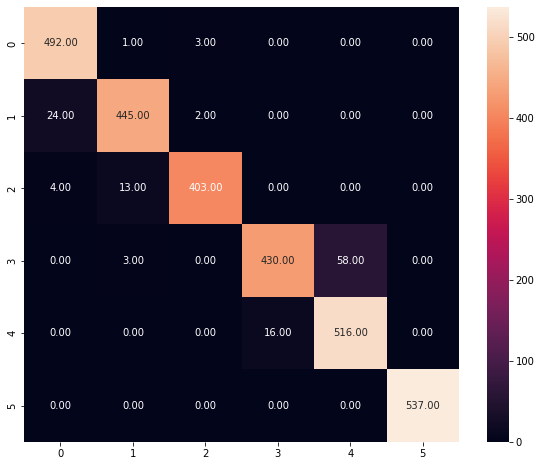

----------------------
  Classificaton Report 
----------------------
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.96      0.94      0.95       471
           3       0.99      0.96      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [45]:
# start grid search
parameters = {'C':[0.01,0.1,1,10,20,30],'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg,param_grid=parameters, cv=3 , verbose=1, n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid ,X_train, Y_train, X_test, Y_test)

# 2.Linear SVC with GridSearchCV

In [46]:
from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:41.700574


Predicting train data
Done 
 

testing_time(HH:MM:SS.ms) - -1 day, 23:59:59.984375


Predicting test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00.015628


-------------------------------------
         Accuracy On Train Data      
-------------------------------------

       0.9951033732317737


-----------------------------------
         Accuracy On Test Data     
-----------------------------------

       0.9650492025788938


---------------------------
      Confusion Matrix     
---------------------------

[[496   0   0   0   0   0]
 [ 17 454   0   0   0   0]
 [  2   5 413   0   0   0]
 [  0   5   0 421  63   2]
 [  1   0   0   8 523   0]
 [  0   0   0   0   0 537]]


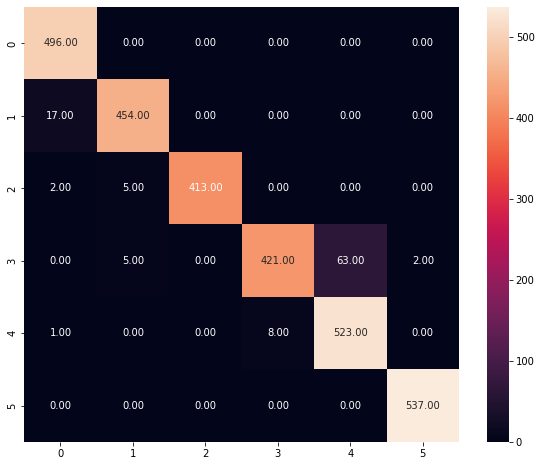

----------------------
  Classificaton Report 
----------------------
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.86      0.92       491
           5       0.89      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.96      2947



In [47]:
parameters = {'C':[0.125,0.5,1,2,8,16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc,param_grid=parameters,n_jobs=-1,verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid,X_train, Y_train, X_test, Y_test)

# 3.Kernel SVM with GridSearchCV

In [48]:
from sklearn.svm import SVC

training the model..
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:04:57.639946


Predicting train data
Done 
 

testing_time(HH:MM:SS.ms) - -1 day, 23:59:55.843304


Predicting test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:01.826344


-------------------------------------
         Accuracy On Train Data      
-------------------------------------

       0.9964635473340587


-----------------------------------
         Accuracy On Test Data     
-----------------------------------

       0.9626739056667798


---------------------------
      Confusion Matrix     
---------------------------

[[489   5   2   0   0   0]
 [ 17 453   1   0   0   0]
 [  4  19 397   0   0   0]
 [  0   2   0 441  48   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


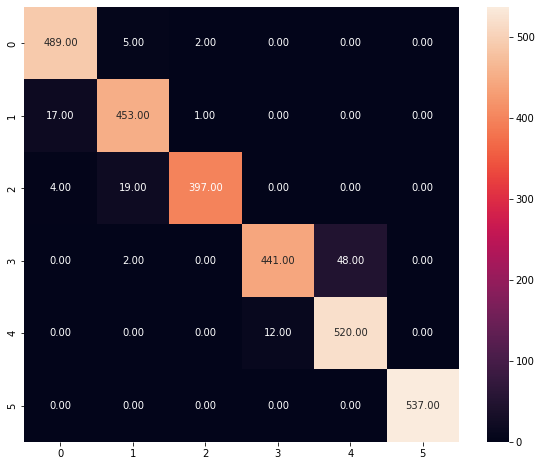

----------------------
  Classificaton Report 
----------------------
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.99      0.95      0.97       420
           4       0.97      0.90      0.93       491
           5       0.92      0.98      0.95       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [49]:
parameters = {'C':[2,8,16],'gamma':[0.0078125,0.125,2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=-1,verbose=1)
lr_svc_grid_results = perform_model(rbf_svm_grid,X_train, Y_train, X_test, Y_test)

# 4. Decision trees with GridSearchCV

In [51]:
from sklearn.tree import DecisionTreeClassifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:14.947131


Predicting train data
Done 
 

testing_time(HH:MM:SS.ms) - -1 day, 23:59:59.984368


Predicting test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00


-------------------------------------
         Accuracy On Train Data      
-------------------------------------

       0.985038084874864


-----------------------------------
         Accuracy On Test Data     
-----------------------------------

       0.8741092636579573


---------------------------
      Confusion Matrix     
---------------------------

[[472   6  18   0   0   0]
 [ 68 372  31   0   0   0]
 [ 16  51 353   0   0   0]
 [  0   0   0 372 119   0]
 [  0   0   0  62 470   0]
 [  0   0   0   0   0 537]]


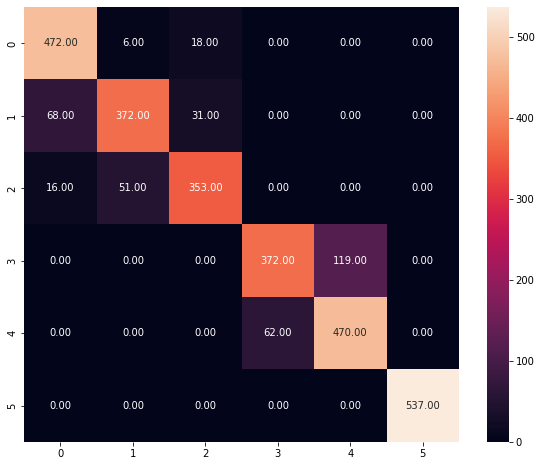

----------------------
  Classificaton Report 
----------------------
              precision    recall  f1-score   support

           1       0.85      0.95      0.90       496
           2       0.87      0.79      0.83       471
           3       0.88      0.84      0.86       420
           4       0.86      0.76      0.80       491
           5       0.80      0.88      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



In [52]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters,n_jobs=-1)
dt_grid_results = perform_model(dt_grid,X_train, Y_train, X_test, Y_test)

# 5. Random-Forest classifier with GridSearchCV

In [53]:
from sklearn.ensemble import RandomForestClassifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:27.162063


Predicting train data
Done 
 

testing_time(HH:MM:SS.ms) - -1 day, 23:59:59.906252


Predicting test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00.046868


-------------------------------------
         Accuracy On Train Data      
-------------------------------------

       1.0


-----------------------------------
         Accuracy On Test Data     
-----------------------------------

       0.9256871394638616


---------------------------
      Confusion Matrix     
---------------------------

[[478  11   7   0   0   0]
 [ 34 430   7   0   0   0]
 [ 19  41 360   0   0   0]
 [  0   0   0 436  55   0]
 [  0   0   0  45 487   0]
 [  0   0   0   0   0 537]]


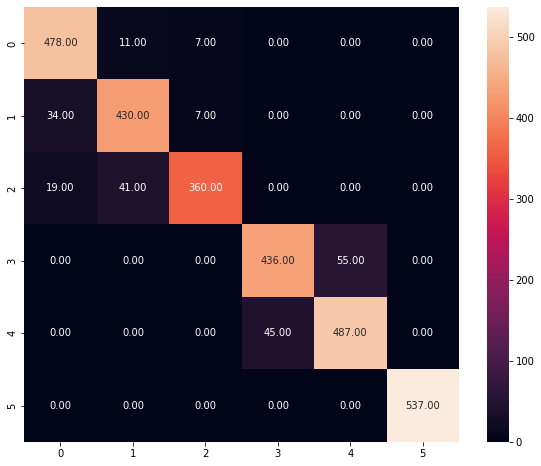

----------------------
  Classificaton Report 
----------------------
              precision    recall  f1-score   support

           1       0.90      0.96      0.93       496
           2       0.89      0.91      0.90       471
           3       0.96      0.86      0.91       420
           4       0.91      0.89      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [55]:
params = {'n_estimators':[100],'max_depth':[50]}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc,param_grid=params,n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid,X_train, Y_train, X_test, Y_test)

# 6.Gradient Boosting Desicion Trees with GridSearchCV

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {'max_depth':[50],'n_estimators':[100]}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt,param_grid=param_grid,n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid,X_train,Y_train,X_test,Y_test)

training the model..


# Applying Deep-Learning models on raw-time series data.

In [44]:
Activities = {0:'WALKING',
              1:'WALKING_UPSTAIRS',
              2:'WALKING_DOWNSTAIRS',
              3:'SITTING',
              4:'STANDING',
              5:'LAYING'
             }

def confusion_matrix(Y_true,Y_pred):
    Y_true = pd.Series([Activities[y] for y in np.argmax(Y_true,axis=1)])
    Y_pred = pd.Series([Activities[y] for y in np.argmax(Y_pred,axis=1)])
    return pd.crosstab(Y_true,Y_pred,rowname=['True'],colnames=['pred'])
    



In [1]:
# Data directory
DATADIR = 'C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals'

In [2]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [16]:
# Utility function to read the data from csv file
def read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            read_csv(filename)
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [17]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'C:/Users/asus/Downloads/UCI HAR Dataset/UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = read_csv(filename)[0]

    return pd.get_dummies(y)

In [18]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [8]:
# Importing tensorflow
np.random.seed(42)
import tensorflow.compat.v1 as tf
tf.set_random_seed(42)

In [9]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [10]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# Import Libraries

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

# Initializing parameters

In [12]:
epochs = 30
batch_size = 16
n_hidden = 32

In [13]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [19]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [25]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


# LSTM Architecture

In [26]:
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                5376      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


# Compiling the model

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model.

In [28]:
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 46s 89ms/step - loss: 1.1127 - accuracy: 0.5184 - val_loss: 0.8751 - val_accuracy: 0.6498
Epoch 2/30
460/460 [==============================] - 39s 85ms/step - loss: 0.7527 - accuracy: 0.6563 - val_loss: 0.7325 - val_accuracy: 0.6841
Epoch 3/30
460/460 [==============================] - 39s 84ms/step - loss: 0.6306 - accuracy: 0.7339 - val_loss: 0.7000 - val_accuracy: 0.7214
Epoch 4/30
460/460 [==============================] - 38s 83ms/step - loss: 0.4740 - accuracy: 0.8498 - val_loss: 0.6070 - val_accuracy: 0.8120
Epoch 5/30
460/460 [==============================] - 36s 78ms/step - loss: 0.3575 - accuracy: 0.8936 - val_loss: 0.4985 - val_accuracy: 0.8273
Epoch 6/30
460/460 [==============================] - 37s 80ms/step - loss: 0.3100 - accuracy: 0.9075 - val_loss: 0.4819 - val_accuracy: 0.8487
Epoch 7/30
460/460 [==============================] - 38s 83ms/step - loss: 0.2486 - accuracy: 0.9218 - val_loss: 0.3698 - val_accuracy:

# Confusion Matrix

In [33]:
X_test.shape

(2947, 128, 9)

In [35]:
Y_test

,1,2,3,4,5,6
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
2942,0,1,0,0,0,0
2943,0,1,0,0,0,0
2944,0,1,0,0,0,0
2945,0,1,0,0,0,0


In [46]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 2s 24ms/step - loss: 0.4429 - accuracy: 0.9128


In [47]:
score

[0.44291552901268005, 0.9127926826477051]